In [1]:
# Hilman Bayu Aji - 1301180397
# Ramawaldi Putra - 1301164506
# IFX-44-GAB

# **Import Library**

In [2]:
import pandas as pd #Pengolahan dataframe
import numpy as np #Perhitungan matematika
import matplotlib.pyplot as plt #Visualisasi
import seaborn as sns #Visualisasi
from sklearn.preprocessing import MinMaxScaler #Normalisasi
from sklearn.neighbors import KNeighborsClassifier #Untuk metode klasifikasi
from sklearn.metrics import f1_score as f1 #Untuk evaluasi

# **Load Data**

In [3]:
df_test = pd.read_csv('https://raw.githubusercontent.com/hilmanpbayu/tubes-malin-tahap-2-classification/main/Dataset/kendaraan_test.csv')
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/hilmanpbayu/tubes-malin-tahap-2-classification/main/Dataset/kendaraan_train.csv')

#Mengubah None menjadi NaN
df.replace("", np.NaN, inplace = True)
df[df.isna().any(axis = 1)]
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


# **Eksplorasi dan Persiapan Data**

In [5]:
#Melihat tipe data
df.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [6]:
#Cek data noise/outlier pada data object/categorical
print(df['Jenis_Kelamin'].value_counts(),'\n', df['Jenis_Kelamin'].isnull().value_counts())
print('----------------------')
print(df['Umur_Kendaraan'].value_counts(),'\n', df['Umur_Kendaraan'].isnull().value_counts())
print('----------------------')
print(df['Kendaraan_Rusak'].value_counts(),'\n', df['Kendaraan_Rusak'].isnull().value_counts())

Pria      146678
Wanita    124713
Name: Jenis_Kelamin, dtype: int64 
 False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64
----------------------
1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64 
 False    271556
True      14275
Name: Umur_Kendaraan, dtype: int64
----------------------
Pernah    137123
Tidak     134520
Name: Kendaraan_Rusak, dtype: int64 
 False    271643
True      14188
Name: Kendaraan_Rusak, dtype: int64


In [7]:
# Cleaning data
# Mengecek nilai null
print(df.isna().sum(),'\n')

#Total missing value
print('Total NaN = ',df.isna().sum().sum())

#Data duplicate
print('Data Duplicate = ',df.duplicated().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64 

Total NaN =  142916
Data Duplicate =  0


Data yang kosong ada sekian banyak serta jumlah data yang memiliki nilai NaN

Text(0.5, 0, 'Lama_Berlangganan')

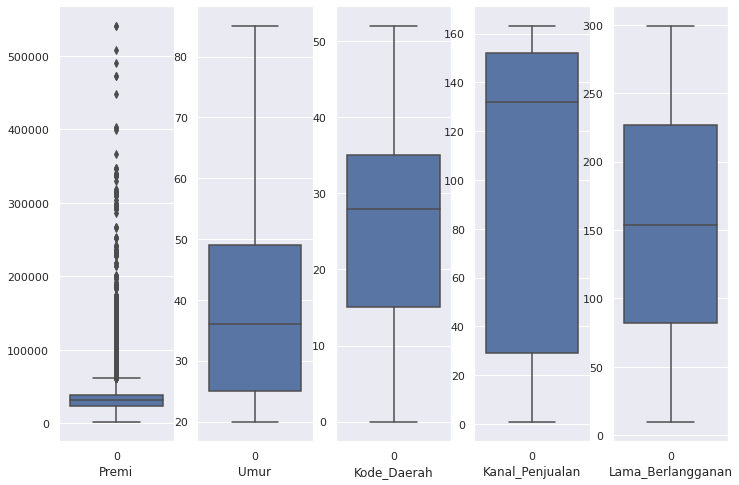

In [8]:
#Cek outlier untuk kolom memiliki banyak nilai

#init plot
sns.set_theme()
fig, ax = plt.subplots(ncols=5, figsize=(12,8))

#plot
sns.boxplot(data=df["Premi"], orient='v', ax=ax[0])
sns.boxplot(data=df["Umur"], orient='v', ax=ax[1])
sns.boxplot(data=df["Kode_Daerah"], orient='v', ax=ax[2])
sns.boxplot(data=df["Kanal_Penjualan"], orient='v', ax=ax[3])
sns.boxplot(data=df["Lama_Berlangganan"], orient='v', ax=ax[4])

#show
ax[0].set_xlabel('Premi')
ax[1].set_xlabel('Umur')
ax[2].set_xlabel('Kode_Daerah')
ax[3].set_xlabel('Kanal_Penjualan')
ax[4].set_xlabel('Lama_Berlangganan')

## Data Cleaning & Transformation

In [9]:
#Drop colom id karena urutan dari pelangggan
df.drop('id',inplace=True, axis=1)

In [10]:
#Transform
#[Nominal to Numeric] Jenis_Kelamin 0 : Wanita | 1 : Pria
df.replace({"Wanita": 0, "Pria": 1}, inplace=True)
df_test.replace({"Wanita": 0, "Pria": 1}, inplace=True)

#[Nominal to Numeric] Umur_Kendaraan --> 1 : 1-2 Tahun | 0 : < 1 Tahun | 2 : > 2 Tahun
df.replace({"< 1 Tahun": 0, "1-2 Tahun": 1, "> 2 Tahun": 2}, inplace=True)
df_test.replace({"< 1 Tahun": 0, "1-2 Tahun": 1, "> 2 Tahun": 2}, inplace=True)

#[Nominal to Numeric] Kendaraan_Rusak --> 0 : Tidak | 1 : Pernah
df.replace({"Tidak": 0, "Pernah": 1}, inplace=True)
df_test.replace({"Tidak": 0, "Pernah": 1}, inplace=True)

In [11]:
#Missing value handler with modus(mode)
for col in df.columns:  
  df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
#Mendeteksi outlier menggunakan Inter Quantile Range(IQR)
def ROutlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    interq = q3-q1
    batasBawah = q1-1.5*interq
    batasAtas = q3+1.5*interq
    df_out =  df.loc[(df[column] > batasBawah) & (df[column] < batasAtas)]
    return df_out

In [13]:
#Remove outlier 2x (1 remove handling, 1 recheck)
df = ROutlier(df,'Premi')
df = ROutlier(df,'Premi')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


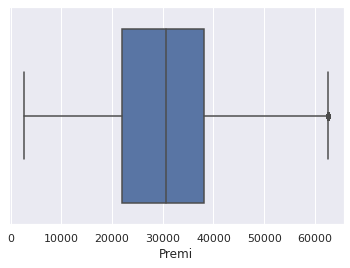

In [14]:
#Outlier check
sns.boxplot(df['Premi'])

# **Pemodelan**

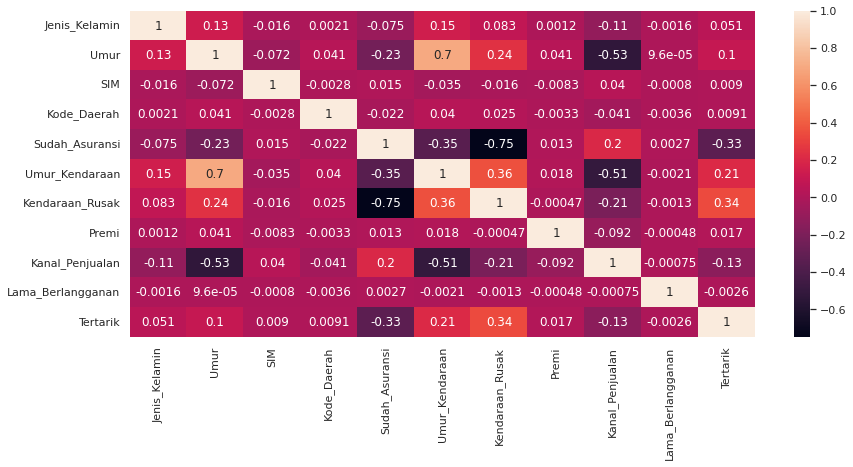

None


Sudah_Asuransi     0.325695
Umur_Kendaraan     0.212195
Kendaraan_Rusak    0.337629
Tertarik           1.000000
Name: Tertarik, dtype: float64

In [15]:
#Searching corelation feature x to 'Tertarik'
plt.figure(figsize=(14,6))
cor = df.corr()
sns.heatmap(cor, annot=True)
print(plt.show())

#Correlation with output variable
cor_target = abs(cor["Tertarik"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

In [16]:
#Getting feature importance from corr to classification to X and label to Y 
#Tahap 1
feature_names = ['Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak']

#Tahap 2
#feature_names = ['Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Kanal_Penjualan']

X = df[feature_names]
y = df['Tertarik']

In [17]:
#Getting train and test to variable
X_train = df[feature_names]
X_test = df_test[feature_names]

y_train = df['Tertarik']
y_test = df_test['Tertarik']

## Normalisasi

In [18]:
# Melakukan Normalisasi
# Data diperkecil agar lebih mudah diklasifikasikan
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K-NN Classifier

'uniform' : Semua poin di setiap lingkungan berbobot sama.

Minkowski Distance : Pengukuran antar 2 titik pada ruang vektor normal yang merupakan hibridisasi yang menggeneralisasi euclidean distance dan mahattan distance.

In [19]:
#k-NN -> k = 5
knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = 5, metric='minkowski')
knn.fit(X_train, y_train)
print('Accuracy of k-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of k-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of k-NN classifier on training set: 0.88
Accuracy of k-NN classifier on test set: 0.88


# **Evaluasi**

In [20]:
#F1 Score
ck_predict = knn.predict(X_test)
print("F1-SCORE ",f1(y_test,ck_predict,average='micro'))
print("F1-SCORE ",f1(y_test,ck_predict,average='macro'))

F1-SCORE  0.8769705493398267
F1-SCORE  0.46722659002203165


Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.

# **Eksperimen**

k-NN sensitif terhadap keberadaan noise & irrelevant input

Jangan dihapus outputannya

([<matplotlib.axis.XTick at 0x7f7760b2fb50>,
 <a list of 5 Text major ticklabel objects>)

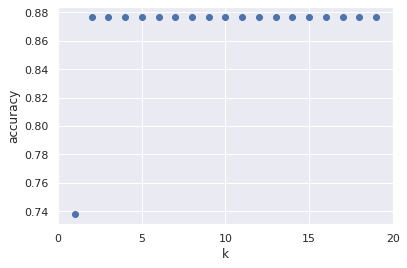

In [ ]:
#Eksplorasi k-NN k= [1..20]
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = k, metric='minkowski')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

'distance' : bobot poin dengan kebalikan dari jarak mereka. Dalam hal ini, tetangga yang lebih dekat dari titik kueri akan memiliki pengaruh yang lebih besar daripada tetangga yang lebih jauh.

Euclidean Distance : Pengukuran jarak garis lurus yang sebenarnya antara dua titik dalam ruang Euclidean.

([<matplotlib.axis.XTick at 0x7f7760954690>,
 <a list of 5 Text major ticklabel objects>)

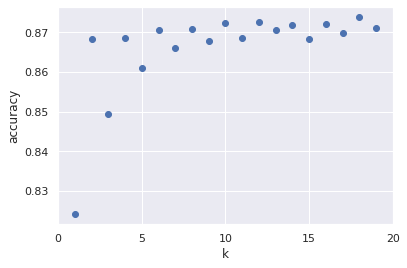

In [ ]:
#Eksplorasi k-NN k = [1..20]
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(weights = 'distance', n_neighbors = k, metric='euclidean')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# **References**

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Solving%20A%20Simple%20Classification%20Problem%20with%20Python.ipynb

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7#:~:text=KNN%20algorithm%20is%20one%20of,the%20most%20used%20learning%20algorithms.&text=KNN%20is%20a%20non%2Dparametric,of%20a%20new%20sample%20point.

https://medium.com/analytics-vidhya/what-is-an-outliers-how-to-detect-and-remove-them-which-algorithm-are-sensitive-towards-outliers-2d501993d59

https://media.neliti.com/media/publications/270379-pengaruh-nilai-k-pada-metode-k-nearest-n-5fa222aa.pdf

https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/

https://tentangdata.wordpress.com/2015/09/16/knn-perhitungan-jarak-serta-keunggulan-dan-batasan/

https://ilmudatapy.com/menangani-missing-values/

https://media.neliti.com/media/publications/270379-pengaruh-nilai-k-pada-metode-k-nearest-n-5fa222aa.pdf